In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets

# The Perceptron

In [3]:
# create a dataset
data_x, data_y = sklearn.datasets.make_blobs(centers=[[-2, -2], [2, 2]], 
                                             cluster_std=[0.3, 1.5], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

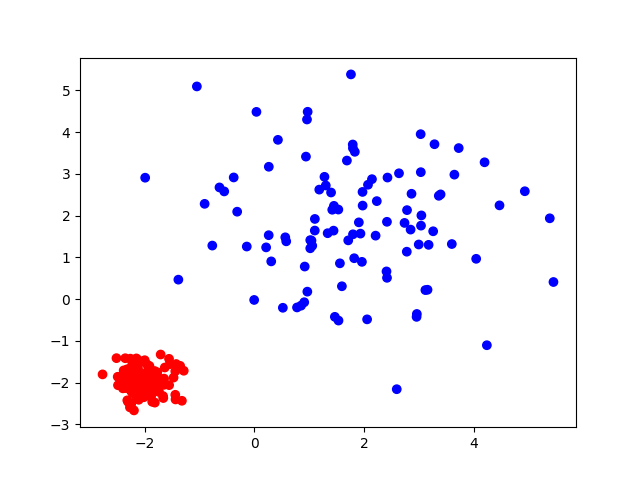

In [4]:
plt.figure()
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(data_y, 'blue', 'red'))
plt.show()

In [5]:
import perceptron
p = perceptron.Perceptron(learn_rate=0.1, size=2)            

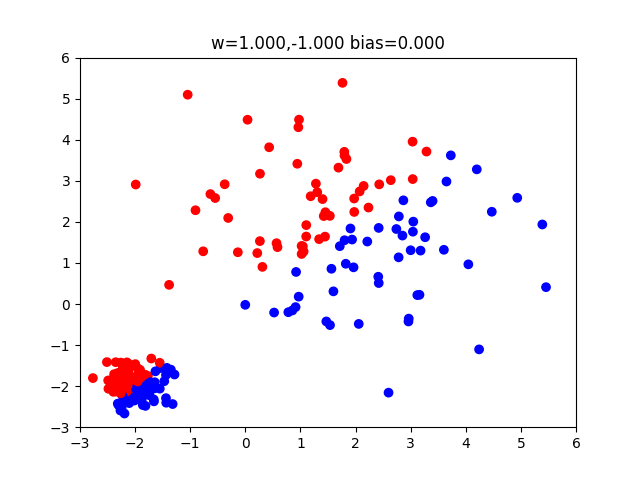

In [6]:
plt.figure()
y_hat = p.predict(data_x)
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y_hat, 'blue', 'red'))

plt.title(f'w={p.w[0]:.3f},{p.w[1]:.3f} bias={p.bias:.3f}')

plt.xlim(-3, 6)
plt.ylim(-3, 6)
plt.show()

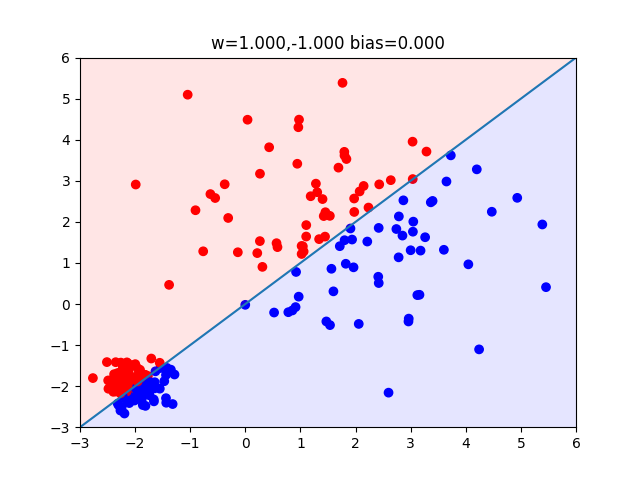

In [7]:
def update_plot():
    plt.clf()
    y_hat = p.predict(data_x)
    plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y_hat, 'blue', 'red'))

    xx = np.array([-4, 8])
    yy = (p.bias-xx*p.w[0]) / p.w[1]
    plt.plot(xx, yy)

    plt.title(f'w={p.w[0]:.3f},{p.w[1]:.3f} bias={p.bias:.3f}')
    plt.fill_between(xx, yy, 8, color='blue' if p.w[0]*p.w[1]>0 else 'red', alpha=0.1)
    plt.fill_between(xx, yy, -4, color='red' if p.w[0]*p.w[1]>0 else 'blue', alpha=0.1)

    plt.xlim(-3, 6)
    plt.ylim(-3, 6)
plt.figure()
update_plot()
plt.show()
i=0

In [8]:
for count in range(1):
    # update the next value
    i = 0 if i+1 >= len(data_x) else i+1
    p.fit(data_x[i:i+1], data_y[i:i+1])
y_hat = p.predict(data_x)
update_plot()


# A Harder Dataset

In [9]:
data_x, data_y = sklearn.datasets.make_circles(n_samples=100, 
                                               shuffle=True, 
                                               noise=0.1, 
                                               random_state=None, 
                                               factor=0.3)

p = perceptron.Perceptron(learn_rate=0.1)


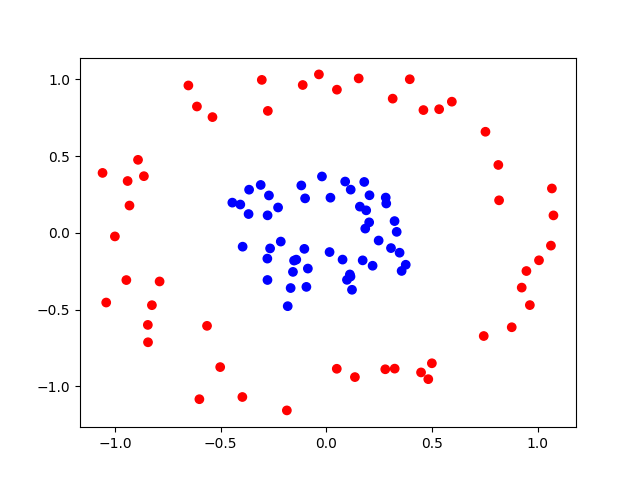

In [10]:
plt.figure()
plt.scatter(data_x[:,0], data_x[:,1], c=np.where(data_y, 'blue', 'red'))
plt.show()

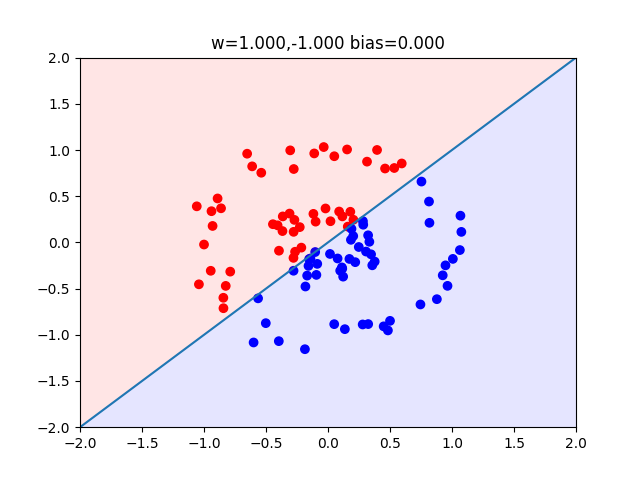

In [11]:
def update_plot():
    plt.clf()
    y_hat = p.predict(data_x)
    plt.scatter(data_x[:,0], data_x[:,1], c=np.where(y_hat, 'blue', 'red'))

    xx = np.array([-4, 4])
    yy = (p.bias-xx*p.w[0]) / p.w[1]
    plt.plot(xx, yy)

    plt.title(f'w={p.w[0]:.3f},{p.w[1]:.3f} bias={p.bias:.3f}')
    plt.fill_between(xx, yy, 8, color='blue' if p.w[0]*p.w[1]>0 else 'red', alpha=0.1)
    plt.fill_between(xx, yy, -4, color='red' if p.w[0]*p.w[1]>0 else 'blue', alpha=0.1)

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
plt.figure()
update_plot()
plt.show()
i=0

In [12]:
for count in range(10):
    i = 0 if i+1 >= len(data_x) else i+1
    p.fit(data_x[i:i+1], data_y[i:i+1])
y_hat = p.predict(data_x)
update_plot()


# Fixing the Problem

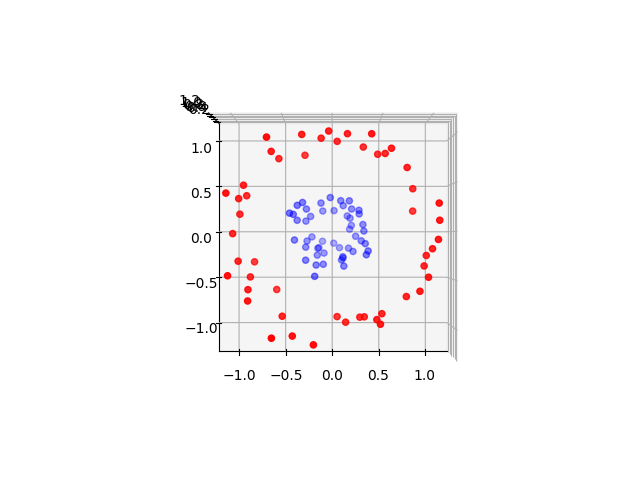

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# generate the new data
zz = np.sqrt(data_x[:,0]**2 + data_x[:,1]**2)

ax.scatter(data_x[:,0], data_x[:,1], zz, color=np.where(data_y, 'blue', 'red'))
ax.view_init(90,-90)

plt.show()